In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
df = pd.read_csv('censo_covid_curitiba.csv', sep=';')
df

,Hospital,Perfil da vaga,Tipo de Leito,Leitos COVID ativados,Total de pacientes internados - confirmados e suspeitos de COVID,Total leitos livres,Outros leitos SUS
0,COMPLEXO HOSPITAL DE CLINICAS,Adulto,UTI,88,84,4,0
1,COMPLEXO HOSPITAL DE CLINICAS,Adulto,Enfermaria,100,80,20,0
2,COMPLEXO HOSPITAL DE CLINICAS,Pedi�trico,UTI,5,1,4,0
3,COMPLEXO HOSPITAL DE CLINICAS,Pedi�trico,Enfermaria,0,0,0,0
4,COMPLEXO HOSPITALAR DO TRABALHADOR,Adulto,UTI,82,79,3,0
5,COMPLEXO HOSPITALAR DO TRABALHADOR,Adulto,Enfermaria,45,50,-5,5
6,CRUZ VERMELHA BRASILEIRA - FILIAL DO ESTADO DO...,Adulto,UTI,10,8,2,0
7,CRUZ VERMELHA BRASILEIRA - FILIAL DO ESTADO DO...,Adulto,Enfermaria,8,9,-1,1
8,HOSPITAL DO IDOSO ZILDA ARNS/VIT�RIA/UPA BOQUE...,Adulto,UTI,170,164,6,0
9,HOSPITAL DO IDOSO ZILDA ARNS/VIT�RIA/UPA BOQUE...,Adulto,Enfermaria,234,201,33,0


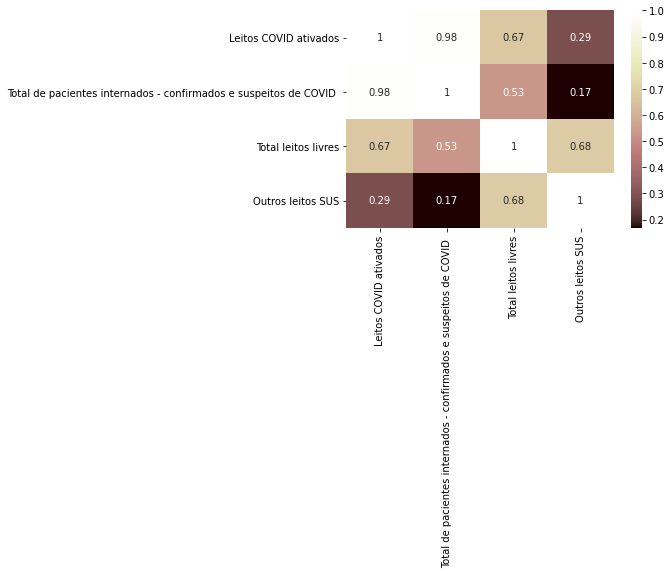

In [79]:
dfcorr = df.corr()
sns.heatmap(dfcorr,annot=True, cmap='pink')
plt.show()

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Leitos COVID ativados,24.0,53.916667,61.727956,0.0,9.50,26.0,84.25,234.0
Total de pacientes internados - confirmados e suspeitos de COVID,24.0,44.916667,53.828162,0.0,6.75,18.0,77.50,201.0
Total leitos livres,24.0,9.000000,13.031734,-5.0,3.00,4.0,12.25,57.0
Outros leitos SUS,24.0,1.125000,3.959716,0.0,0.00,0.0,0.00,19.0


<AxesSubplot:ylabel='Frequency'>

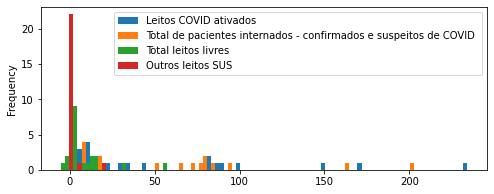

In [81]:
df.plot.hist(figsize=(8, 3), bins=100)

In [82]:
df.columns

Index(['Hospital', 'Perfil da vaga', 'Tipo de Leito', 'Leitos COVID ativados',
       'Total de pacientes internados - confirmados e suspeitos de COVID ',
       'Total leitos livres', 'Outros leitos SUS'],
      dtype='object')

<AxesSubplot:>

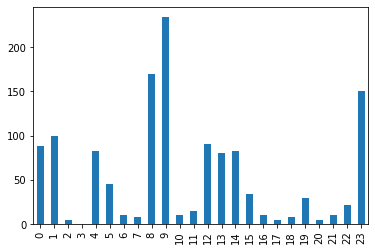

In [83]:
df['Leitos COVID ativados'].plot.bar()

In [84]:
relation = pd.DataFrame({'counts': df['Leitos COVID ativados'].values}, index=df['Hospital'].values)

<AxesSubplot:>

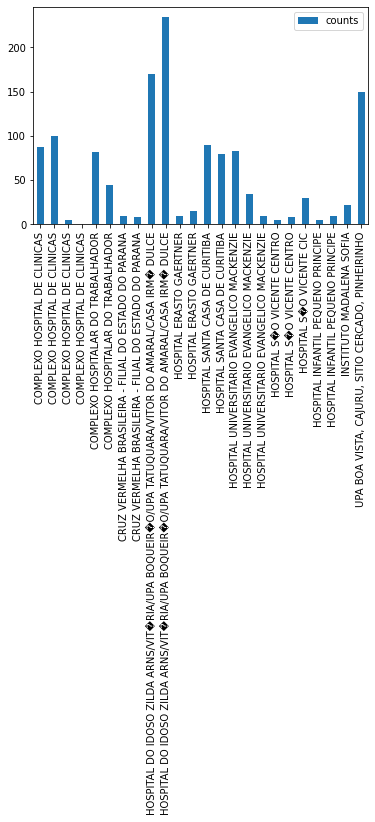

In [85]:
relation.plot(kind='bar')

In [87]:
df.index=df['Hospital']
profile_dummies = []
leito_dummies = []
for i in df['Perfil da vaga'].values:
    if i == 'Adulto':
        profile_dummies.append(1)
    else:
        profile_dummies.append(0)

for i in df['Tipo de Leito'].values:
    if i == 'UTI':
        leito_dummies.append(1)
    else:
        leito_dummies.append(0)
df['Perfil'] = profile_dummies
df['UTI_Enferm'] = leito_dummies
df.drop(columns=['Hospital', 'Perfil da vaga', 'Tipo de Leito'], inplace=True)

In [91]:
df.columns = ['Leitos ativos', 'Total pacientes', 'leitos livres', 'leitos SUS', 'perfil', 'uti_enferm']

In [92]:
df.head()

,Leitos ativos,Total pacientes,leitos livres,leitos SUS,perfil,uti_enferm
Hospital,,,,,,
COMPLEXO HOSPITAL DE CLINICAS,88,84,4,0,1,1
COMPLEXO HOSPITAL DE CLINICAS,100,80,20,0,1,0
COMPLEXO HOSPITAL DE CLINICAS,5,1,4,0,0,1
COMPLEXO HOSPITAL DE CLINICAS,0,0,0,0,0,0
COMPLEXO HOSPITALAR DO TRABALHADOR,82,79,3,0,1,1


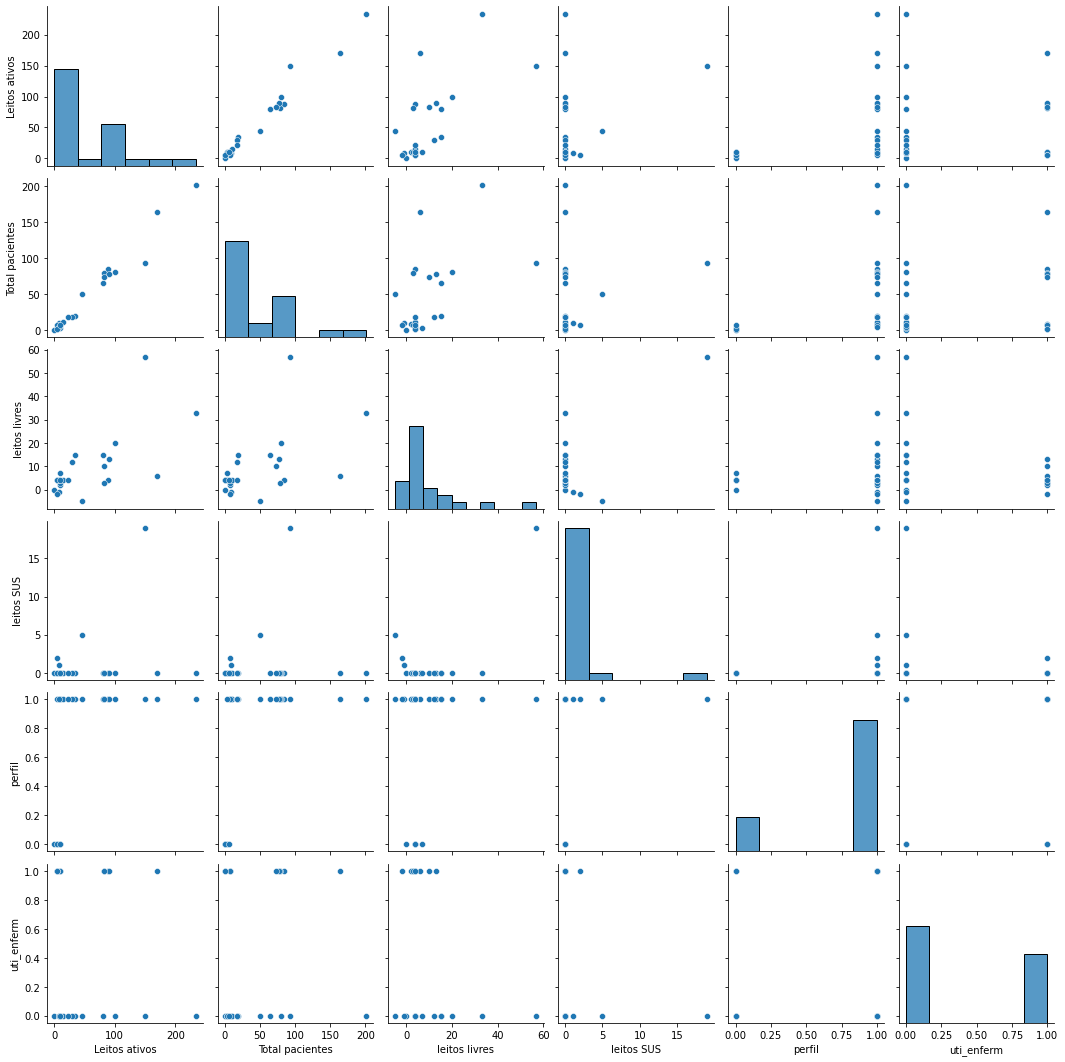

In [94]:
sns.pairplot(df)

<AxesSubplot:xlabel='Hospital'>

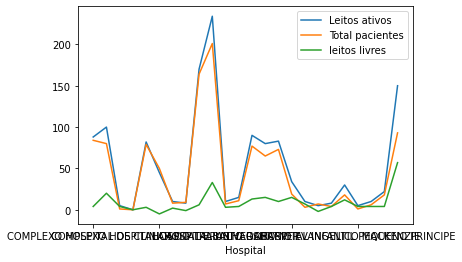

In [97]:
df[['Leitos ativos', 'Total pacientes', 'leitos livres']].plot()